In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Rectangle



In [19]:
from matplotlib import rc
rc('animation', html='jshtml')


In [20]:
# For Antarctica
anta = np.loadtxt("antarctica_mass_200204_202505.txt", comments="HDR")
time_anta = anta[:, 0]
mass_anta = anta[:, 1]
unc_anta  = anta[:, 2]

# Greenland
green = np.loadtxt("greenland_mass_200204_202505.txt", comments="HDR")
time_green = green[:, 0]
mass_green = green[:, 1]
unc_green  = green[:, 2]

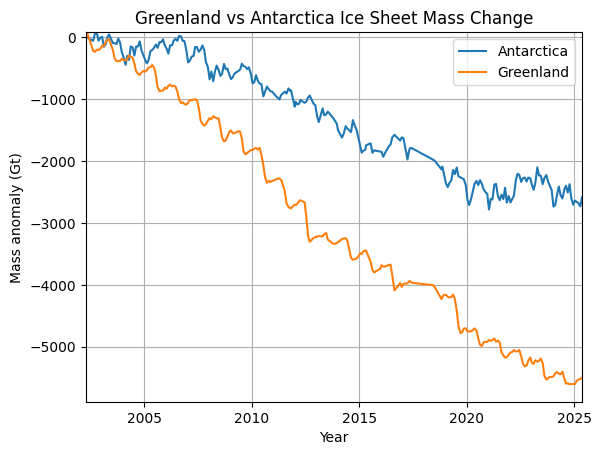

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xlabel("Year")
ax.set_ylabel("Mass anomaly (Gt)")
ax.set_title("Greenland vs Antarctica Ice Sheet Mass Change")

# Use combined min/max for axis limits
all_time_min = min(time_anta.min(), time_green.min())
all_time_max = max(time_anta.max(), time_green.max())
all_mass_min = min(mass_anta.min(), mass_green.min())
all_mass_max = max(mass_anta.max(), mass_green.max())

ax.set_xlim(all_time_min, all_time_max)
ax.set_ylim(all_mass_min * 1.05, all_mass_max * 1.05)

# Plot full time series for each
ax.plot(time_anta, mass_anta, label="Antarctica")
ax.plot(time_green, mass_green, label="Greenland")

ax.legend()
ax.grid(True)

plt.show()


In [23]:
min_mass = mass_green.min()           # most negative value, e.g. ~ -5600 Gt
frac_remaining = 1 + mass_green / abs(min_mass)


In [24]:

# So animations embed nicely in Jupyter
from matplotlib import rc
rc('animation', html='jshtml')

# Optional: downsample frames so it isn't too long
num_frames = 120
indices = np.linspace(0, len(frac_remaining) - 1, num_frames, dtype=int)
frac_anim = frac_remaining[indices]
time_anim = time_green[indices]

fig, ax = plt.subplots(figsize=(4, 6))

# Background box (full height frame for context)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Draw a gray frame to represent the "full ice volume"
frame_box = Rectangle((0.25, 0), 0.5, 1.0, edgecolor='black', facecolor='lightgray')
ax.add_patch(frame_box)

# This is the white ice block that will shrink
ice_box = Rectangle((0.25, 0), 0.5, frac_anim[0], facecolor='white')
ax.add_patch(ice_box)

# Add text for year + maybe Gt lost
year_text = ax.text(0.5, 0.95, "", ha='center', va='center', fontsize=12)
info_text = ax.text(0.5, 0.90, "", ha='center', va='center', fontsize=10)

ax.set_title("Greenland Ice Sheet Mass Loss (Conceptual)", pad=20)

def init():
    ice_box.set_height(frac_anim[0])
    year_text.set_text("")
    info_text.set_text("")
    return ice_box, year_text, info_text

def update(frame):
    frac = frac_anim[frame]
    year = time_anim[frame]

    # Update the ice height
    ice_box.set_height(frac)

    # Update text
    year_text.set_text(f"Year: {year:.1f}")
    percent_remaining = frac * 100
    percent_lost = 100 - percent_remaining
    info_text.set_text(f"Ice remaining: {percent_remaining:.0f}%\nIce lost: {percent_lost:.0f}%")

    return ice_box, year_text, info_text

anim = FuncAnimation(
    fig,
    update,
    init_func=init,
    frames=len(frac_anim),
    interval=100,   # ms between frames
    blit=True
)

plt.close(fig)  # prevents double output
HTML(anim.to_jshtml())


In [25]:
# Fit mass = a * t + b
coeffs = np.polyfit(time_green, mass_green, 1)
a, b = coeffs
print("Slope (Gt/yr):", a)
print("Intercept (Gt):", b)


Slope (Gt/yr): -261.1431362824947
Intercept (Gt): 522940.8493331023


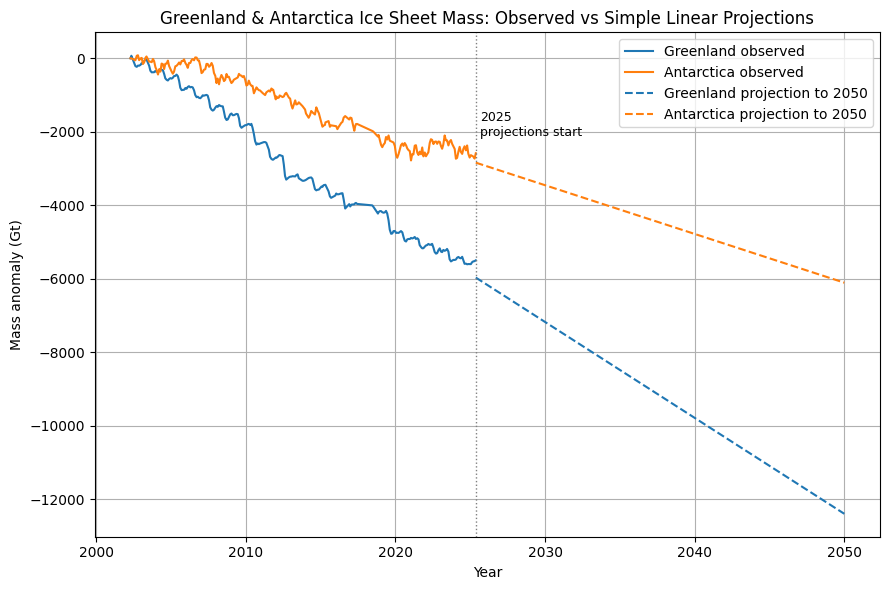

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# --- Fit linear trends ---

# Greenland: mass = a_g * t + b_g
a_g, b_g = np.polyfit(time_green, mass_green, 1)

# Antarctica: mass = a_a * t + b_a
a_a, b_a = np.polyfit(time_anta, mass_anta, 1)

# --- Historical time ranges ---
t_hist_g = time_green
m_hist_g = mass_green

t_hist_a = time_anta
m_hist_a = mass_anta

# --- Future time points (up to 2050) ---
t_max_hist = max(t_hist_g.max(), t_hist_a.max())
t_future = np.linspace(t_max_hist, 2050, 100)

m_future_g = a_g * t_future + b_g
m_future_a = a_a * t_future + b_a

# --- Plot ---

plt.figure(figsize=(9,6))

# Observed
plt.plot(t_hist_g, m_hist_g, label="Greenland observed", color="tab:blue")
plt.plot(t_hist_a, m_hist_a, label="Antarctica observed", color="tab:orange")

# Projections
plt.plot(t_future, m_future_g, "--", label="Greenland projection to 2050", color="tab:blue")
plt.plot(t_future, m_future_a, "--", label="Antarctica projection to 2050", color="tab:orange")

# Vertical line marking end of observational record
plt.axvline(t_max_hist, color="gray", linestyle=":", linewidth=1)
plt.text(t_max_hist + 0.3,
         (np.mean(m_hist_g) + np.mean(m_hist_a)) / 2,
         "2025\nprojections start",
         fontsize=9)

plt.xlabel("Year")
plt.ylabel("Mass anomaly (Gt)")
plt.title("Greenland & Antarctica Ice Sheet Mass: Observed vs Simple Linear Projections")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


I used a simple linear regression model to extend the observed GRACE/GRACE-FO mass anomaly trends for Greenland and Antarctica into the future (e.g., to 2050). This model assumes that the average rate of ice loss observed from 2002–2025 continues unchanged. The projected lines help visualize the potential magnitude of continued mass loss if current trends persist. However, this is not a full climate/ice-sheet model: it does not include changes in greenhouse gas emissions, feedbacks, or dynamic processes that could either accelerate or slow ice loss. Therefore, these projections should be viewed as a simple statistical extension of past behavior, useful for visualization and discussion rather than precise prediction.